### 1. Business Understanding

Gold (XAU/USD) is one of the most traded commodities in the world. Its price fluctuates daily based on global economic conditions, inflation expectations, and investor sentiment. 
Predicting short-term gold prices can help traders and analysts make informed investment decisions and identify potential trends in the market.

**Objective:**  
To predict the next few days of gold prices using ARIMA (AutoRegressive Integrated Moving Average), a time-series forecasting model.

**Business Goals:**
- Analyze recent gold price trends.
- Build a predictive model using ARIMA.
- Evaluate forecast accuracy and visualize future trends.


In [6]:
import pandas as pd

file_path = "gold_data.csv"

# Read the file with multi-row header
df = pd.read_csv(file_path, header=[0, 1])

# Flatten column headers
df.columns = [col[0] for col in df.columns]

# Rename first column to Date
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

# Drop any rows where Date is not a valid date
df = df[df["Date"].str.match(r"\d{4}-\d{2}-\d{2}", na=False)]

# Convert to datetime safely
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any invalid dates
df.dropna(subset=["Date"], inplace=True)

# Set Date as index
df.set_index("Date", inplace=True)

print("✅ Dataset cleaned and loaded successfully!\n")
print(df.head())
print("\nData Summary:")
print(df.describe())





✅ Dataset cleaned and loaded successfully!

                  Close         High          Low         Open  Volume
Date                                                                  
2025-09-15  3682.199951  3686.399902  3635.100098  3640.000000   210.0
2025-09-16  3688.899902  3698.600098  3681.399902  3681.399902   373.0
2025-09-17  3681.800049  3685.199951  3661.600098  3669.000000   183.0
2025-09-18  3643.699951  3667.399902  3637.000000  3654.600098    80.0
2025-09-19  3671.500000  3685.899902  3658.199951  3659.000000   211.0

Data Summary:
             Close         High          Low         Open         Volume
count    43.000000    43.000000    43.000000    43.000000      43.000000
mean   3956.586028  3987.376743  3922.055812  3952.193036    6089.767442
std     174.455951   190.986650   162.596230   184.643823   27709.607135
min    3643.699951  3667.399902  3635.100098  3640.000000       0.000000
25%    3830.299927  3846.550049  3784.349976  3801.400024     299.500000
50%   

## 3. Data Understanding & Visualization

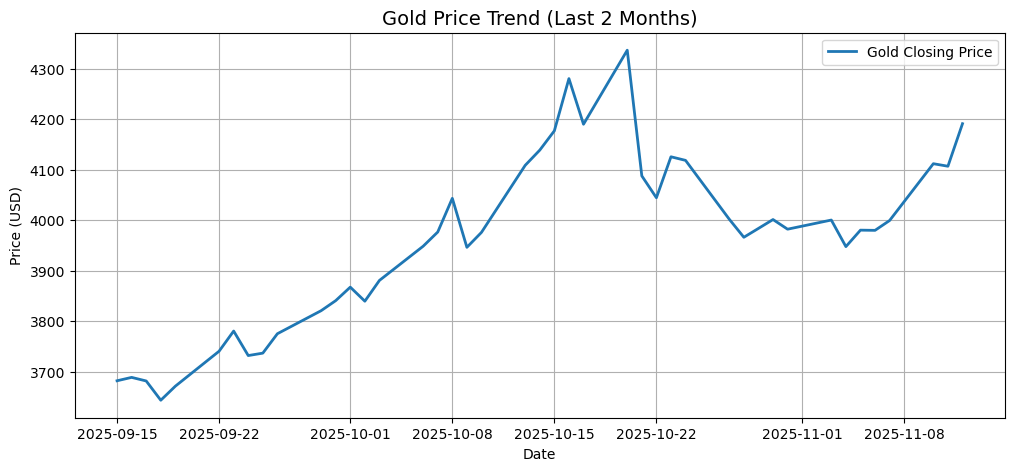


Missing values per column:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [7]:
import matplotlib.pyplot as plt

# Plot gold closing prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Gold Closing Price", linewidth=2)
plt.title("Gold Price Trend (Last 2 Months)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


### 3. Data Understanding
The line chart shows how gold prices changed over the last two months.
We will use the 'Close' price for forecasting because it best represents the final market sentiment for each day.


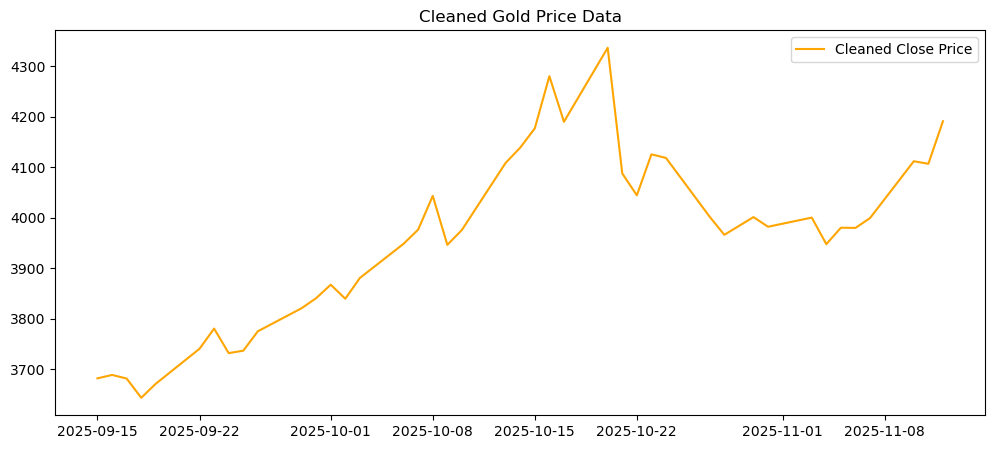

✅ Data prepared for modeling.


In [8]:
# Use only the 'Close' price for modeling
data = df[["Close"]]

# Fill or drop missing values if any
data = data.dropna()

# Visualize again to confirm clean data
plt.figure(figsize=(12, 5))
plt.plot(data, label="Cleaned Close Price", color='orange')
plt.title("Cleaned Gold Price Data")
plt.legend()
plt.show()

print("✅ Data prepared for modeling.")


### 4. Data Preparation
We selected the 'Close' column as our target variable and ensured the dataset has no missing values.
This cleaned data will now be used to fit the ARIMA model.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Fit ARIMA model (you can later tune p,d,q values)
model = ARIMA(data["Close"], order=(5,1,0))
model_fit = model.fit()

# Forecast for the next 7 days
forecast = model_fit.forecast(steps=7)

# Display results
print("Next 7 Days Forecast:\n")
print(forecast)
